In [318]:
import pandas as pd
import numpy as np

In [319]:
data = pd.read_csv('/content/loan.csv')

#convort lone status into ones and zeros
data.Loan_Status = data.Loan_Status.map({'Y':1,'N':0})
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [320]:
# Check the missing values
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


**Pre-processing the data text**

In [321]:
# Delete Lone_Status column
lone_status = data.Loan_Status
data.drop('Loan_Status',axis=1,inplace=True)
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [322]:
lone_status.value_counts()

,count
Loan_Status,
1,422
0,192


In [323]:
data.shape

(614, 12)

In [324]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [325]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [326]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Label Encode**

In [327]:
data.head()
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [328]:
# for Gender
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})
data.Gender.value_counts()

,count
Gender,
1.0,489
0.0,112


In [329]:
data.describe()

,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,601.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.813644,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,0.389718,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,1.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,1.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: >

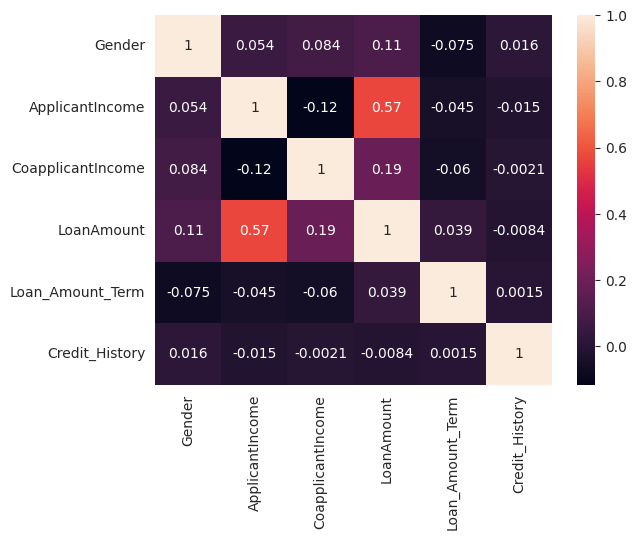

In [330]:
# Co-Relationship with HeatMap

corr = data[['Gender', 	'ApplicantIncome', 	'CoapplicantIncome', 	'LoanAmount', 	'Loan_Amount_Term' ,	'Credit_History']]
sns.set_style('whitegrid')
sns.heatmap(corr.corr(),annot=True)


In [331]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [332]:
# For Maritial Status
data['Married'] = data['Married'].map({'Yes':1,'No':0})

In [333]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [334]:
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [335]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [336]:
# for Education
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0})

In [337]:
# for Self_Employed
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0})

In [338]:
# for Property_Area
data['Property_Area'] = data['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})

In [339]:
data.dtypes

,0
Loan_ID,object
Gender,float64
Married,float64
Dependents,float64
Education,int64
Self_Employed,float64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


<Axes: >

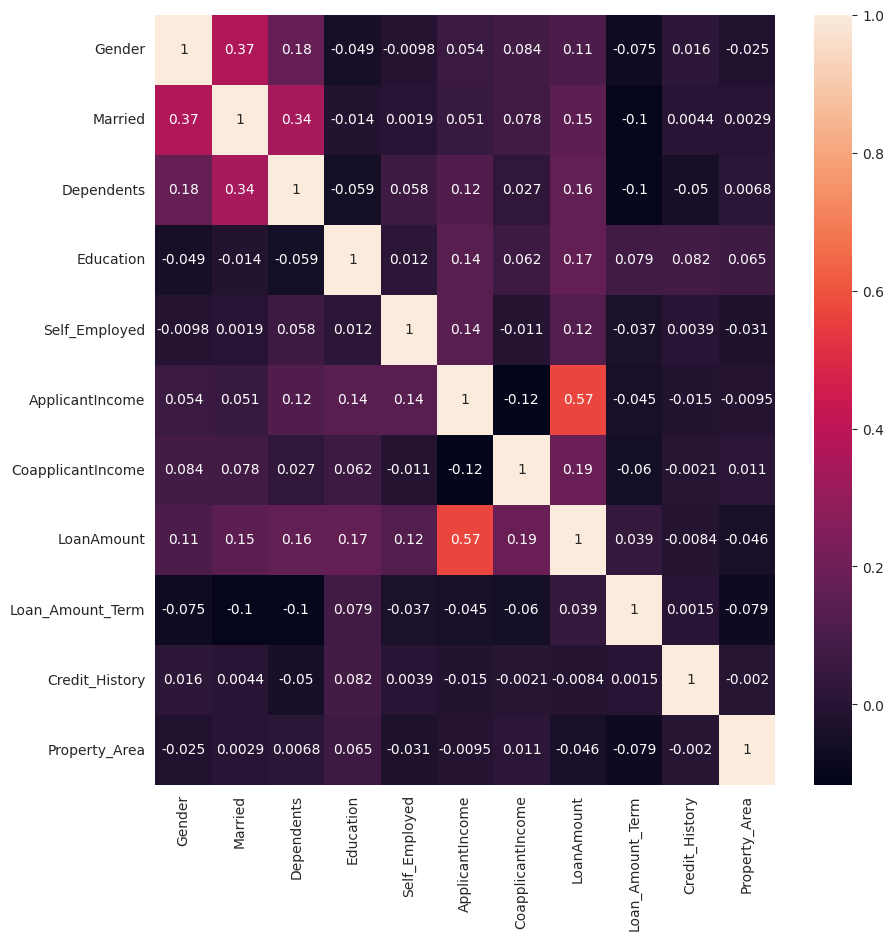

In [340]:
corr = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
             'ApplicantIncome', 	'CoapplicantIncome', 	'LoanAmount',
             'Loan_Amount_Term' ,	'Credit_History','Property_Area']]
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.heatmap(corr.corr(),annot=True)

In [341]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


# **Handle Missing values**

In [342]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [343]:
data['Gender'].fillna(np.random.randint(0,2),inplace=True)

In [344]:
data['Married'].fillna(np.random.randint(0,2),inplace=True)

In [345]:
data['Dependents'].fillna(data['Dependents'].median(),inplace=True)

In [346]:
data['Self_Employed'].fillna(np.random.randint(0,2),inplace=True)

In [347]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [348]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)

In [349]:
data['Credit_History'].fillna(np.random.randint(0,2),inplace=True)

In [350]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

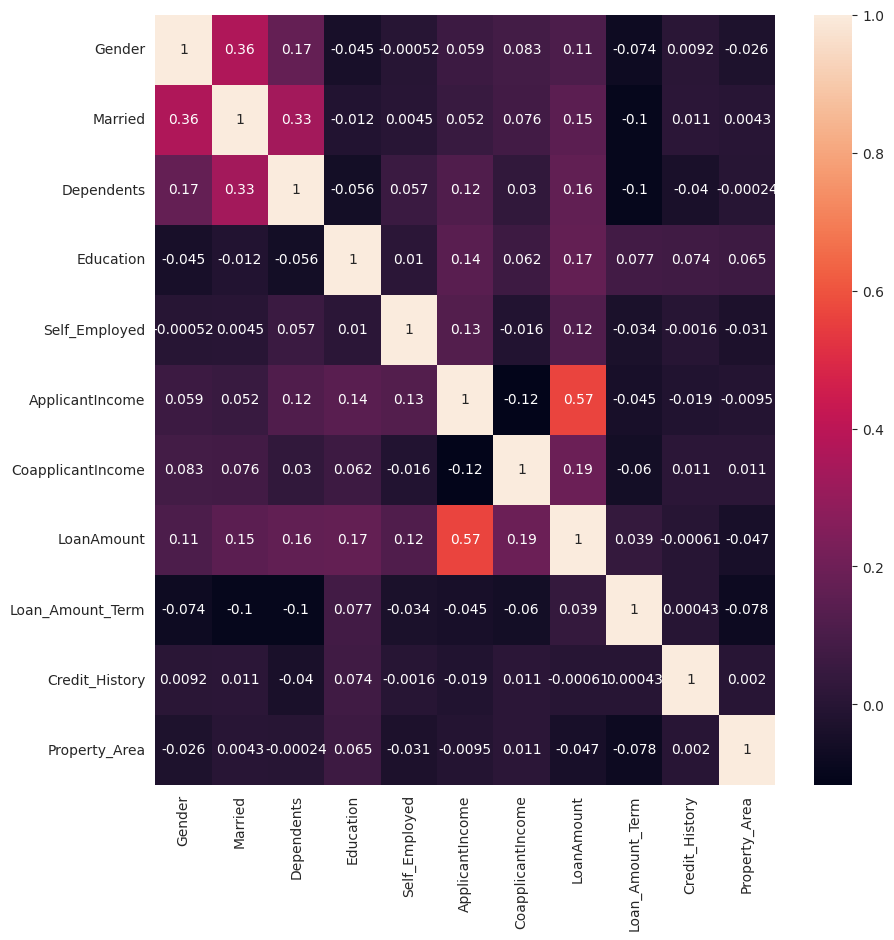

In [351]:
corr = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
             'ApplicantIncome', 	'CoapplicantIncome', 	'LoanAmount',
             'Loan_Amount_Term' ,	'Credit_History','Property_Area']]
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.heatmap(corr.corr(),annot=True)

In [352]:
# drop the Loan_ID
data.drop('Loan_ID',axis=1,inplace=True)

In [353]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


In [354]:
data.shape

(614, 11)

In [355]:
data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# **Split Data Into X and Y**

In [356]:
!pip install scikit-learn

In [357]:
train_X = data.iloc[:461] #first 500 raws
train_y = lone_status.iloc[:461]

In [358]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(train_X,train_y,random_state=0)

In [359]:
train_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
7,1.0,1.0,3.0,1,0.0,3036,2504.0,158.0,360.0,0.0,1
157,1.0,1.0,1.0,1,0.0,9538,0.0,187.0,360.0,1.0,2
382,0.0,0.0,0.0,1,0.0,6000,0.0,156.0,360.0,1.0,2
22,1.0,1.0,0.0,0,0.0,2600,1911.0,116.0,360.0,0.0,1
68,1.0,1.0,3.0,0,1.0,7100,0.0,125.0,60.0,1.0,2


In [360]:
test_X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
330,1.0,0.0,1.0,1,0.0,4384,1793.0,117.0,360.0,1.0,2
153,1.0,1.0,2.0,0,0.0,2281,0.0,113.0,360.0,1.0,0
135,1.0,1.0,3.0,1,0.0,4000,7750.0,290.0,360.0,1.0,1
78,1.0,1.0,3.0,1,0.0,3167,4000.0,180.0,300.0,0.0,1
360,0.0,0.0,1.0,1,0.0,4723,0.0,81.0,360.0,1.0,1


In [361]:
test_X.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# **Using Different types of machine learning Model**

In [362]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# **Fit the all ML models**

In [363]:
models =[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear Discriminant Analysis',LinearDiscriminantAnalysis()))
models.append(('K- Neirest Neighbors',KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('Support Vector Machine',SVC()))
models.append(('Random Forest Classifier',RandomForestClassifier()))

In [364]:
scoring = 'accuracy'

In [365]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results=[]
names=[]

In [366]:
for name,model in models:
  kfold = KFold(n_splits=10)
  cv_results = cross_val_score(model,train_X,train_y,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(model)
  print("%s %f" %(name,cv_results.mean()))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()
Logistic Regression 0.791092
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.788403
KNeighborsClassifier()
K- Neirest Neighbors 0.594286
DecisionTreeClassifier()
Decision Tree Classifier 0.649328
GaussianNB()
Naive Bayes 0.776639
SVC()
Support Vector Machine 0.660924
RandomForestClassifier()
Random Forest Classifier 0.759496


In [367]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LDA = LinearDiscriminantAnalysis()
LDA.fit(train_X,train_y)
pred = LDA.predict(test_X)
print("Model Accuracy: ",accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Model Accuracy:  0.8362068965517241
[[11 17]
 [ 2 86]]
              precision    recall  f1-score   support

           0       0.85      0.39      0.54        28
           1       0.83      0.98      0.90        88

    accuracy                           0.84       116
   macro avg       0.84      0.69      0.72       116
weighted avg       0.84      0.84      0.81       116



In [368]:
print(pred)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


In [369]:
X_test = data.iloc[461:,]

In [370]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
461,1.0,1.0,3.0,1,0.0,7740,0.0,128.0,180.0,1.0,2
462,1.0,1.0,0.0,1,0.0,3015,2188.0,153.0,360.0,1.0,0
463,0.0,0.0,1.0,0,0.0,5191,0.0,132.0,360.0,1.0,1
464,1.0,0.0,0.0,1,0.0,4166,0.0,98.0,360.0,0.0,1
465,1.0,0.0,0.0,1,0.0,6000,0.0,140.0,360.0,1.0,0


In [371]:
prediction = LDA.predict(X_test)

In [372]:
print(prediction)

[1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0]


In [373]:
t = LDA.predict([[1.0 ,	1.0 	,3.0 ,	1 ,	0.0 ,	7740, 	0.0 ,	1280000.0 ,	180.0 ,	1.0, 	2]])
print(t)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [375]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(train_X,train_y)

LinearDiscriminantAnalysis()

In [376]:
import pickle

file="LDA_Model.pkl"
with open(file,'wb') as f:
  pickle.dump(model,f)


In [377]:
with open(file,'rb') as f:
  k = pickle.load(f)

In [379]:
c = k.predict([[1.0 ,	1.0 	,3.0 ,	1 ,	0.0 ,	7740, 	0.0 ,	128.0 ,	180.0 ,	1.0, 	2]])
print(c)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
